In [399]:
import numpy as np
from helpers import *
import pandas as pd

In [400]:
day = '16'
month = '01'
year = '2024'

btc_path = f'../data/BTCUSDT/BTCUSDT-1s-{year}-{month}-{day}.parquet'
eth_path = f'../data/ETHUSDT/ETHUSDT-1s-{year}-{month}-{day}.parquet'

In [401]:
btc_data = pd.read_parquet(btc_path)
btc_data.head()

,Open time,Open
0,1705363200000,42511.10
1,1705363201000,42511.10
2,1705363202000,42511.10
3,1705363203000,42510.00
4,1705363204000,42510.01


In [402]:
eth_data = pd.read_parquet(eth_path)
eth_data.head()

,Open time,Open
0,1705363200000,2511.79
1,1705363201000,2511.77
2,1705363202000,2511.77
3,1705363203000,2511.51
4,1705363204000,2511.51


In [403]:
t = 5*60
base_time = 36000

btc_prices = btc_data['Open']
eth_prices = eth_data['Open']
btc_prices_std = standardize(btc_prices)
eth_prices_std = standardize(eth_prices)

In [404]:
btc_prices_std

array([-1.81554778, -1.81554778, -1.81554778, ...,  0.81238268,
        0.81238268,  0.81238268])

In [405]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

In [406]:
from thermal_optimal_path.lattice import partition_function
from thermal_optimal_path.statistics import average_path

In [407]:
temperature = 0.1
minute = 40  
base_time = 3600
total = len(btc_prices_std)
# total = 1

df_avg = []
weights = np.exp(np.linspace(0, 2, minute))  
weights /= weights.sum()
for i in range(total-minute):
    end_time = i + minute
    btc = btc_prices_std[i:end_time]
    eth = eth_prices_std[i:end_time]

    g = partition_function(btc, eth, temperature)
    avg_path = average_path(g)[::2]
    weighted_avg = np.dot(avg_path, weights)
    df_avg.append(weighted_avg)

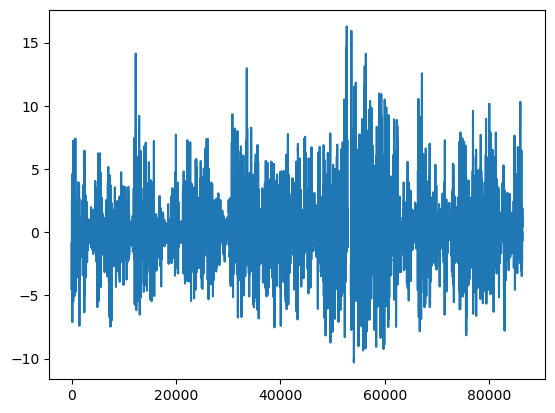

In [408]:
plt.plot(df_avg)

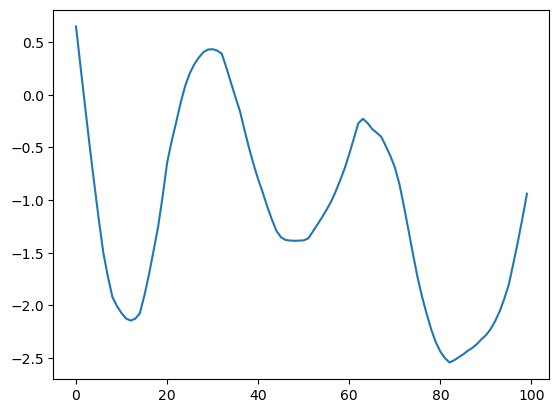

In [409]:
base_time = 36000
t = 100

plt.plot(df_avg[base_time:base_time+t])

In [410]:
btc_prices.head(5)

0    42511.10
1    42511.10
2    42511.10
3    42510.00
4    42510.01
Name: Open, dtype: float64

In [411]:
btc_prices.pct_change().rolling(window=5).mean().head(10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5    0.000023
6    0.000061
7    0.000061
8    0.000038
9    0.000038
Name: Open, dtype: float64

In [412]:
btc_returns = btc_prices.pct_change().rolling(window=5).mean()[minute:]
eth_returns = eth_prices.pct_change().rolling(window=5).mean()[minute:]

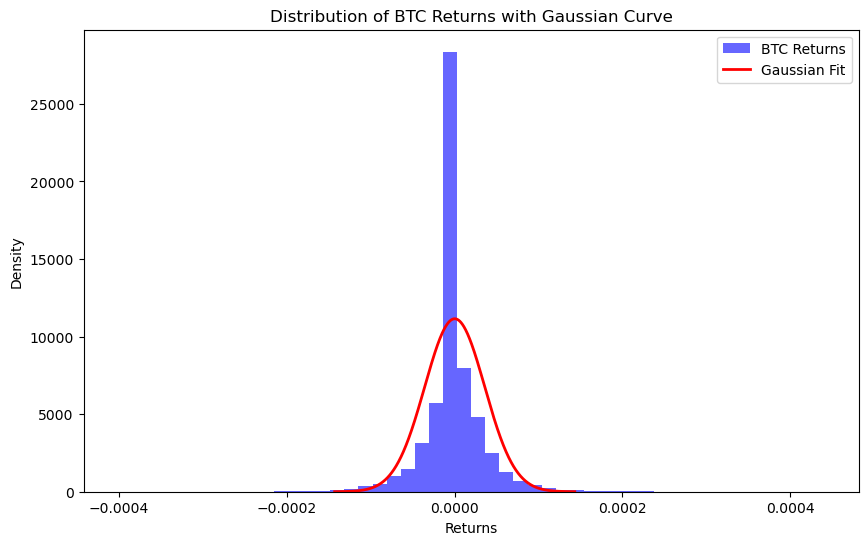

In [413]:
from scipy.stats import norm
plt.figure(figsize=(10, 6))
plt.hist(btc_returns, bins=50, density=True, alpha=0.6, color='blue', label='BTC Returns')

mean = np.mean(btc_returns)
std = np.std(btc_returns)
x = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
gaussian_curve = norm.pdf(x, mean, std)
plt.plot(x, gaussian_curve, color='red', linewidth=2, label='Gaussian Fit')

plt.title('Distribution of BTC Returns with Gaussian Curve')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

In [414]:
print(np.percentile(btc_returns, 5))
print(np.percentile(eth_returns, 5))

-5.588517978731611e-05
-5.7094419053165255e-05


In [415]:
print(np.percentile(btc_returns, 95))
print(np.percentile(eth_returns, 95))

5.448956090899351e-05
6.100298704400767e-05


In [416]:
len(btc_returns)

86360

In [417]:
len(df_avg)

86360

In [418]:
from strategies import basic_strategy

In [419]:
basic_strategy(btc_prices[minute:], btc_returns, eth_prices[minute:], eth_returns, df_avg)

Long ETH, price: 2517.1, total money: -1, i: 52497
Sold ETH at price: 2516.54, total money: -0.0002224782487783017, i: 52498
Long ETH, price: 2514.19, total money: -1.0002224782487783, i: 52642
Sold ETH at price: 2513.83, total money: -0.00036566551783911994, i: 52643
Long ETH, price: 2513.96, total money: -1.000365665517839, i: 52644
Sold ETH at price: 2513.72, total money: -0.00046113243059831, i: 52645
Long ETH, price: 2513.79, total money: -1.0004611324305983, i: 52646
Sold ETH at price: 2513.05, total money: -0.0007555086513644227, i: 52647
Long ETH, price: 2530.14, total money: -1.0007555086513644, i: 53588
Sold ETH at price: 2529.54, total money: -0.0009926496791335948, i: 53590
Short ETH, price: 2534.87, total money: 0.9990073503208664, i: 54128
Bought back ETH at price: 2534.53, total money: -0.0008585205127464857, i: 54129
Short ETH, price: 2532.0, total money: 0.9991414794872535, i: 54176
Bought back ETH at price: 2531.39, total money: -0.0006176042410245275, i: 54178
Short 